## Load the dataset

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

train_file_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_file_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

train_df = pd.read_csv(train_file_path)
forecast_df = pd.read_csv(test_file_path)
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## House Price Distribution
Now, let's get statistical information about the numeric and non-numeric columns in our dataset.

In [3]:
train_df.describe(include = [np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
isnull_features = train_df.isna().sum().sort_values(ascending = False)
isnull_features[isnull_features >0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

The highest percentage of data is missing on Pool QC. After doing further analysis with the train data set, 
Pool area and pool QC both are dependent each other. Pool QS is null when pool area is 0.

### Handling Outlier

Outlier is an observation in a given dataset that lies far from the rest of the observations. In statistics, we have three measures of central tendency namely Mean, Median, and Mode. Based on statistics, lot area and GrlivArea have high cost of mean.  

In [5]:
train_df.describe(include = [np.number]).transpose().sort_values(by= 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0


In [6]:
print(train_df['TotalBsmtSF'].sort_values(ascending = False).head(5))
print(train_df['1stFlrSF'].sort_values(ascending = False).head(5))
print(train_df['GrLivArea'].sort_values(ascending = False).head(5))
print(train_df['LotArea'].sort_values(ascending = False).head(5))

1298    6110
332     3206
496     3200
523     3138
440     3094
Name: TotalBsmtSF, dtype: int64
1298    4692
496     3228
523     3138
1024    2898
1373    2633
Name: 1stFlrSF, dtype: int64
1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64
313    215245
335    164660
249    159000
706    115149
451     70761
Name: LotArea, dtype: int64


Plot the scatter plot to visualize the outlier and delete outlier from data set.

(1460, 81)
(1445, 81)


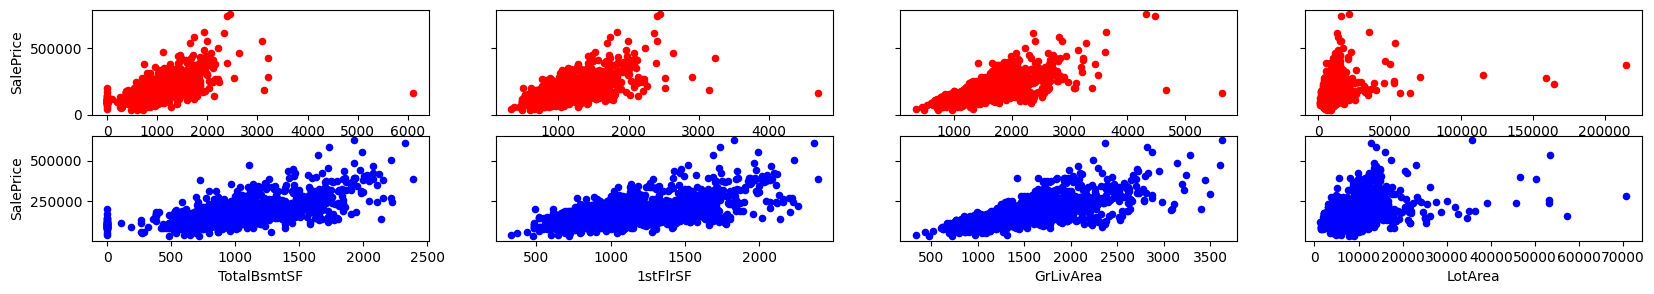

In [7]:
# clear outliers
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,3))
axes = np.ravel(axes)
#High mean cols names more than 1000 excepy years
col_names=['TotalBsmtSF','1stFlrSF', 'GrLivArea','LotArea']
for i, c in zip(range(5), col_names):
    train_df.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')
print(train_df.shape)

train_df = train_df[train_df['TotalBsmtSF'] < 3000]
train_df = train_df[train_df['1stFlrSF'] < 2500]
train_df = train_df[train_df['GrLivArea'] < 4000]
train_df = train_df[train_df['LotArea'] < 100000]
print(train_df.shape)

for i, c in zip(range(4,9), col_names):
    train_df.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

### Correlation
We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. Spearman’s Rank Correlation is a statistical measure of the strength and direction of the monotonic relationship between two continuous variables

In [8]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


anscombe_data = train_df.drop('SalePrice', axis=1)
# Selecting four sets of 11 data points
subset_data = anscombe_data[anscombe_data.columns]

score = []
for col in subset_data:
    corr, pval = spearmanr(anscombe_data[col], train_df['SalePrice'])
    score.append([col, corr, pval])

spearmanr_score =  pd.DataFrame(score, columns=['Field','correlation', 'p-value'])
spearmanr_score = spearmanr_score[spearmanr_score['correlation'] > 0.5].sort_values(by = 'correlation', 
                                                                                        ascending = False)
#spearmanr_score = spearmanr_score.sort_values(by = 'p-value',ascending = False)
spearmanr_score.reset_index(drop=True, inplace=True)
spearmanr_score

,Field,correlation,p-value
0,OverallQual,0.809811,0.000000e+00
1,GrLivArea,0.727611,1.845570e-238
2,GarageCars,0.688801,8.097831e-204
3,YearBuilt,0.656664,5.054795e-179
4,GarageArea,0.647569,1.503856e-172
5,FullBath,0.631814,7.596706e-162
6,TotalBsmtSF,0.594623,6.846300e-139
7,YearRemodAdd,0.576076,1.589425e-128
8,1stFlrSF,0.566740,1.488784e-123
9,TotRmsAbvGrd,0.527853,1.822478e-104


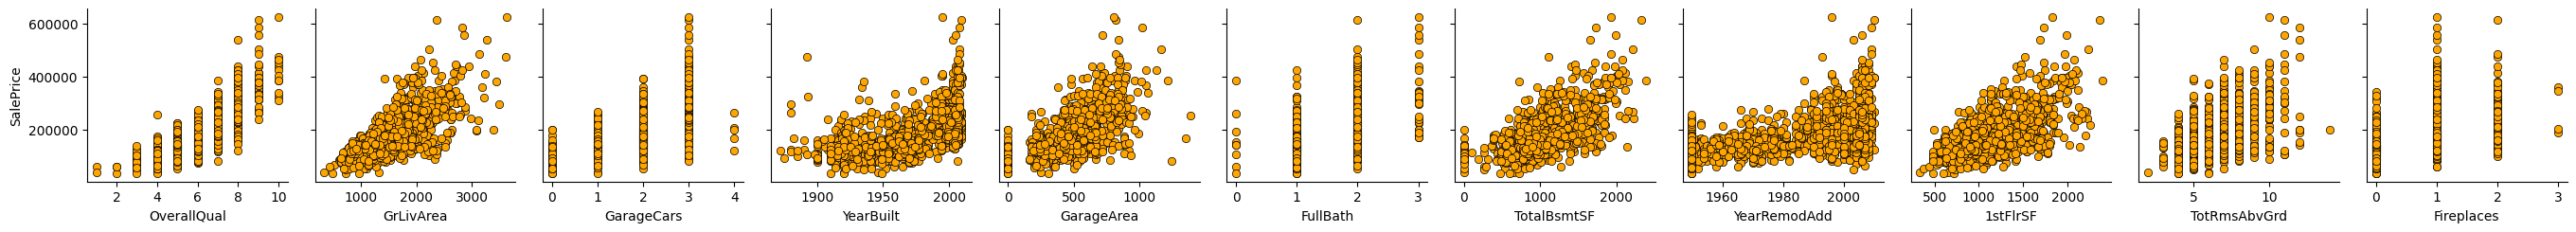

In [9]:
x = spearmanr_score['Field'].tolist()
g = sns.PairGrid(train_df, y_vars=["SalePrice"], x_vars=x);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);
#taking a copy of data set before start cleaning data.
train = train_df
test = forecast_df

### Feature Engineering

In [10]:
from datetime import datetime

current_year = datetime.now().year
train['ageofhouse'] = current_year - train['YearBuilt']
train['ageofgrg'] = current_year - train['GarageYrBlt']
train['nooffullbath'] = train['BsmtFullBath']+ train['FullBath']
train['nohalfbath'] = train['BsmtHalfBath']+ train['HalfBath']

test['ageofhouse'] = current_year - test['YearBuilt']
test['ageofgrg'] = current_year - test['GarageYrBlt']
test['nooffullbath'] = test['BsmtFullBath']+ train['FullBath']
test['nohalfbath'] = test['BsmtHalfBath']+ train['HalfBath']


train.drop(['YearBuilt','GarageYrBlt','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], inplace = True, axis=1)
test.drop(['YearBuilt', 'GarageYrBlt','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], inplace = True, axis=1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageofhouse,ageofgrg,nooffullbath,nohalfbath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,21,21.0,3,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,48,48.0,2,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,23,23.0,3,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,109,26.0,2,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,24,24.0,3,1


### Data pre-process

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"] 


# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features =X.select_dtypes(exclude=['object']).columns.tolist()

# Define preprocesing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

### Model validation before Tuning.

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2024-03-31 00:28:45.678512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 00:28:45.678638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 00:28:45.832265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
def ML_models(model, X_train, X_test, y_train, y_test, preprocessor):
    
    regr_trans = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', model)])
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= model.__class__.__name__

    scores = cross_val_score(regr_trans, X, y, cv=5)
    mean_accuracy = scores.mean()
    
    return (algoname, round(r2_score(y_test, yhat),3), np.sqrt(mean_squared_error(y_test, yhat)),
            mean_accuracy )

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn import svm
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor

#params = {'model__verbose': -1 }

algo=[GradientBoostingRegressor(), 
      lgbm.LGBMRegressor(), 
      xg.XGBRFRegressor(),
      xg.XGBRegressor(),
      linear_model.LinearRegression(), 
      RandomForestRegressor(),
      DecisionTreeRegressor(), 
      linear_model.Lasso(),
      Ridge(),
      svm.SVR(),
      CatBoostRegressor(verbose=False),
      linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
      ]

score=[]

for model in algo:
    score.append(ML_models(model, X_train, X_test, y_train, y_test, preprocessor))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3430
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 189
[LightGBM] [Info] Start training from score 178394.359862
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 190
[LightGBM] [Info] Start training from score 178369.263841
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3444
[LightGBM] [Info] Number of data points in the

In [16]:
print(pd.DataFrame(score, columns=['Model', 'R2-Score', 'RMSE', 'cross_val_score' ]).
      sort_values(by='cross_val_score', ascending = False))

                        Model  R2-Score          RMSE  cross_val_score
10          CatBoostRegressor     0.897  27787.520497         0.917976
0   GradientBoostingRegressor     0.894  28096.369686         0.906349
1               LGBMRegressor     0.885  29275.269336         0.905165
8                       Ridge     0.894  28208.926807         0.899629
7                       Lasso     0.892  28451.945288         0.896871
4            LinearRegression     0.892  28479.215244         0.893247
3                XGBRegressor     0.870  31137.058239         0.886747
5       RandomForestRegressor     0.854  33011.855731         0.884087
11                 ElasticNet     0.839  34723.038256         0.873809
2              XGBRFRegressor     0.841  34449.457215         0.862361
6       DecisionTreeRegressor     0.783  40254.866223         0.755952
9                         SVR    -0.045  88410.433073        -0.052275


The Best models are GradientBoostingRegressor, LGBMRegressor, CatBoostRegressor

In [17]:
def gridsearch(pipeline, parameter_space, X_train, y_train):
    # Perform GridSearchCV
    clf = GridSearchCV(pipeline, 
                       parameter_space, 
                       cv=5, 
                       scoring='neg_root_mean_squared_error' 
                       #,verbose=2
                      )
    clf.fit(X_train, y_train)
    return clf.best_params_

#### CatBoostRegressor

In [18]:
model = CatBoostRegressor(verbose=False)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])


parameter_space = {'regressor__depth' : [6,8,10],
                  'regressor__learning_rate' : [0.01, 0.05, 0.1],
                  'regressor__iterations'    : [30, 50, 100]
              }

clf = GridSearchCV(estimator=pipeline, 
                   param_grid = parameter_space, 
                   cv = 5, 
                   n_jobs=-1, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X, y)
print('Best parms: ', clf.best_params_)
#print('Best Estimators: ', clf.best_estimator_)

y_hat = clf.best_estimator_.predict(X)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 

Best parms:  {'regressor__depth': 6, 'regressor__iterations': 100, 'regressor__learning_rate': 0.1}
RMSE: 15568.62
R2 Score: 0.96 3


#### GradientBoostingRegressor

In [19]:
#GradientBoostingRegressor
model = GradientBoostingRegressor()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

parameter_space = {
                    "regressor__learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0],
                    "regressor__n_estimators": [5, 10, 50],
                    "regressor__subsample": [0.5, 0.7, 1.0],
                    "regressor__max_depth": [3, 5]
                }

clf = GridSearchCV(estimator=pipeline, 
                   param_grid = parameter_space, 
                   cv = 5, 
                   n_jobs=-1, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X, y)
print('Best parms: ', clf.best_params_)
#print('Best Estimators: ', clf.best_estimator_)

y_hat = clf.best_estimator_.predict(X)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 

Best parms:  {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 50, 'regressor__subsample': 0.7}
RMSE: 10371.55
R2 Score: 0.98 3


#### LGBRegressor

In [20]:
#LGBRegressor 
model = lgbm.LGBMRegressor(verbosity=-1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

parameter_space = {
                    'regressor__num_leaves': [7, 14, 21, 28, 31, 50],
                    'regressor__learning_rate': [0.1, 0.03, 0.003],
                    'regressor__max_depth': [-1, 3, 5],
                    'regressor__n_estimators': [50, 100, 200, 500],
                }

clf = GridSearchCV(estimator=pipeline, 
                   param_grid = parameter_space, 
                   cv = 5, 
                   n_jobs=-1, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X, y)
print('Best parms: ', clf.best_params_)
#print('Best Estimators: ', clf.best_estimator_)

y_hat = clf.best_estimator_.predict(X)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 


Best parms:  {'regressor__learning_rate': 0.03, 'regressor__max_depth': -1, 'regressor__n_estimators': 500, 'regressor__num_leaves': 7}
RMSE: 13212.30
R2 Score: 0.97 3


#### RidgeRegressor

In [21]:
#Ridge
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge(random_state=3))])
parameter_space = {
    "regressor__alpha": [1, 10, 100],
    "regressor__fit_intercept": [True, False],
    "regressor__solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(pipeline, parameter_space, cv=5, scoring='neg_root_mean_squared_error')
clf.fit(X, y)

y_hat = clf.best_estimator_.predict(X)

print('Best parms: ', clf.best_params_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 

Best parms:  {'regressor__alpha': 10, 'regressor__fit_intercept': False, 'regressor__solver': 'sparse_cg'}
RMSE: 19320.85
R2 Score: 0.93 3


#### LassoRegressor

In [22]:
#Lasso
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', linear_model.Lasso())])

parameter_space = {
                    "regressor__alpha": [0.1, 1, 10, 100],
                    "regressor__fit_intercept": [True, False],
                    "regressor__precompute": [True, False],
                    "regressor__copy_X": [True, False],
                    "regressor__selection": ['cyclic']
                   }


clf = GridSearchCV(pipeline, parameter_space, cv=5, scoring='neg_root_mean_squared_error')
clf.fit(X, y)
y_hat = clf.best_estimator_.predict(X)

print('Best Parm: ', clf.best_params_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 

Best Parm:  {'regressor__alpha': 100, 'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__precompute': True, 'regressor__selection': 'cyclic'}
RMSE: 20136.41
R2 Score: 0.93 3


#### RandomForestRegressor

In [23]:
#Randomeforest

#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import GridSearchCV
# Create a pipeline with preprocessing and RandomForestRegressor model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Define parameter grid for GridSearchCV
parameter_space = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30]
}

clf = GridSearchCV(pipeline, parameter_space, cv=5, scoring='neg_root_mean_squared_error')
clf.fit(X, y)

# Get the best model from grid search
best_model = clf.best_estimator_

y_hat = clf.best_estimator_.predict(X)
print('Best Parameter:', clf.best_params_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y, y_hat)))
print('R2 Score: %.2f' % r2_score(y, y_hat),3) 


Best Parameter: {'regressor__max_depth': 20, 'regressor__n_estimators': 300}
RMSE: 9351.66
R2 Score: 0.98 3


Based on RMSE and R2-score, the Best model is - RandomForestRegressor

#### Model Prediction on test data & Submission

In [24]:
# Evaluate the models on the validation data
y_test_pred = best_model.predict(test)

#Create a DataFrame with the predicted values
predictions_df = pd.DataFrame({'Id': test['Id'], 'SalePrice':y_test_pred})

# Print or display the DataFrame
print("Test dataset with predicted sale prices:")
print(predictions_df)
predictions_df.to_csv('submission.csv', index=False)

Test dataset with predicted sale prices:
        Id      SalePrice
0     1461  130735.137778
1     1462  155199.636667
2     1463  177765.212659
3     1464  180771.800340
4     1465  195686.520000
...    ...            ...
1454  2915   85856.153333
1455  2916   86467.236667
1456  2917  152537.965556
1457  2918  113894.070741
1458  2919  225342.193333

[1459 rows x 2 columns]
